In [1]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('1301_aqi_location.csv')
data.head()

df = pd.read_csv("D:/计算机大三上/大数据分析实践/project/CN-Reanalysis201301/201301/CN-Reanalysis-daily-2013010100.csv")
df['时间'] = '13-1-1'
for date in range(2,32):
    with open("D:/计算机大三上/大数据分析实践/project/CN-Reanalysis201301/201301/CN-Reanalysis-daily-201301{}00.csv".format(str(date).zfill(2))) as f:
        df_temp = pd.read_csv(f)
        time = '13-1-{}'.format(date)
        df_temp['时间'] = '13-1-{}'.format(date)
        df = pd.concat([df,df_temp])

In [12]:
df = df.drop(columns=[' '])

In [15]:
df['speed'] = df.apply(lambda row: (row[' lat']**2 + row[' lon']**2)**0.5, axis=1)

In [19]:
df = df.drop(columns=[' lat', ' lon'])

In [20]:
df.keys()

Index(['PM2.5(微克每立方米)', ' PM10(微克每立方米)', ' SO2(微克每立方米)', ' NO2(微克每立方米)',
       ' CO(毫克每立方米)', ' O3(微克每立方米)', ' U(m/s)', ' V(m/s)', ' TEMP(K)',
       ' RH(%)', ' PSFC(Pa)', '时间', 'speed'],
      dtype='object')

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
selected_columns = ['PM2.5(微克每立方米)', ' PM10(微克每立方米)', ' SO2(微克每立方米)', ' NO2(微克每立方米)',
       ' CO(毫克每立方米)', ' O3(微克每立方米)', ' TEMP(K)',
       ' RH(%)', ' PSFC(Pa)', 'speed']

selected_df = df[selected_columns]

# 计算关联矩阵
correlation_matrix = selected_df.corr()

In [56]:
correlation_matrix = correlation_matrix.drop(columns=['PM2.5(微克每立方米)', ' PM10(微克每立方米)', ' SO2(微克每立方米)', ' NO2(微克每立方米)',
       ' CO(毫克每立方米)', ' O3(微克每立方米)'])
correlation_matrix = correlation_matrix.drop([' TEMP(K)', ' RH(%)', ' PSFC(Pa)', 'speed'], axis=0)

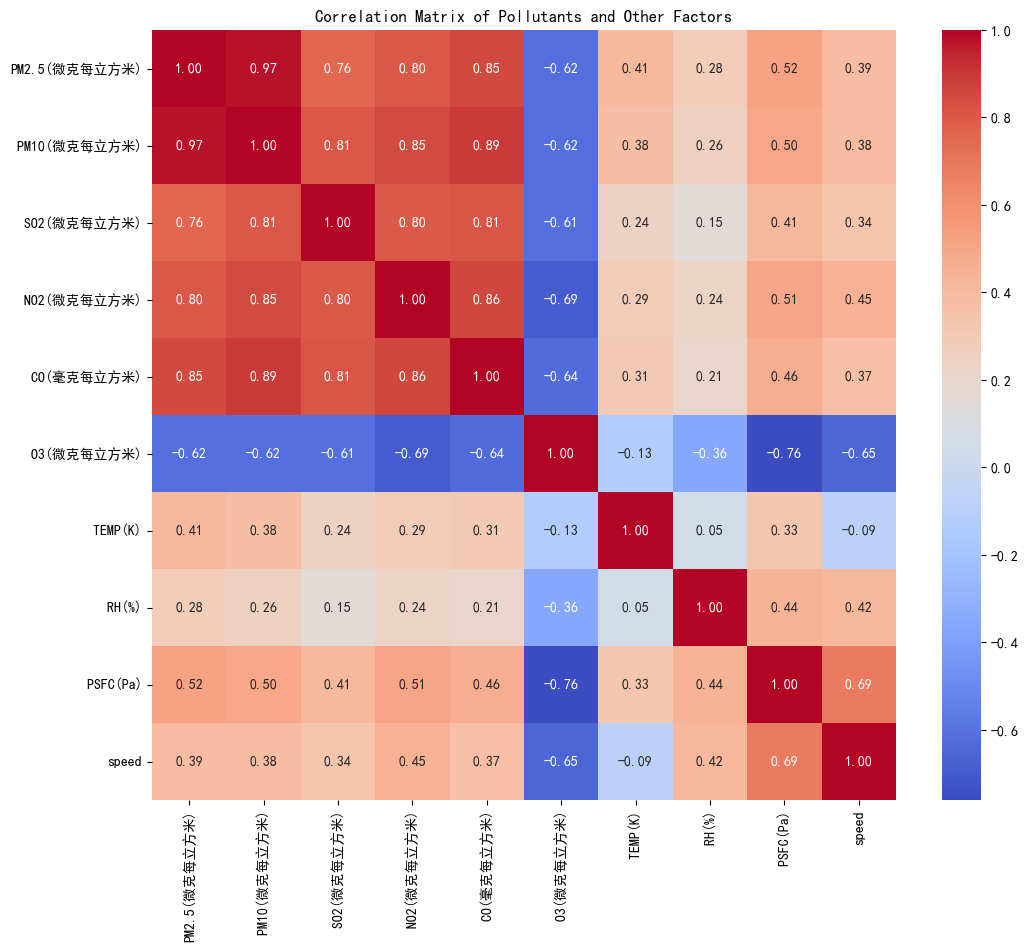

In [61]:
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Pollutants and Other Factors')
plt.show()

In [63]:
correlation_matrix.to_csv('relation.csv')

In [64]:
import matplotlib.pyplot as plt
import numpy as np

# 假设 u 和 v 是您的水平风速和垂直风速数据

# 生成高度数据
heights = np.linspace(0, 10, 50)  # 假设有50个高度数据点，范围从0到10

# 绘制风廓线图
plt.figure(figsize=(8, 6))

# 绘制水平风速
plt.plot(u, heights, label='水平风速 (u)', color='blue')

# 绘制垂直风速
plt.plot(v, heights, label='垂直风速 (v)', color='red')

plt.xlabel('风速')
plt.ylabel('高度')
plt.title('风廓线')
plt.legend()
plt.grid()

plt.show()


NameError: name 'u' is not defined

<Figure size 800x600 with 0 Axes>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import mpl
# 指定默认字体
mpl.rcParams['font.sans-serif'] = ['KaiTi']
# 解决保存图像是负号'-'显示为方块的问题
mpl.rcParams['axes.unicode_minus'] = False
import os

import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

result = pd.read_csv('./关联分析/result.csv', encoding='utf-8')

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# 假设你有这些数据
# 以下是示例数据，请替换成你的实际数据
pm25_data = np.array(result['PM2.5'])
pm10_data = np.array(result['PM10'])
so2_data=np.array(result['SO2'])
o3_data=np.array(result['O3'])
co_data=np.array(result['CO'])
no2_data=np.array(result['NO2'])
electricity_data = np.array(result['发电量'])
gdp_per_capita_data = np.array(result['人均gdp'])

# 将数据转换为二维数组
X = np.column_stack((pm25_data, pm10_data,so2_data,o3_data,co_data,no2_data))

# 用电量和人均 GDP 作为目标变量
y_electricity = electricity_data
y_gdp_per_capita = gdp_per_capita_data

# 创建并训练用于拟合用电量的线性回归模型
model_electricity = LinearRegression()
model_electricity.fit(X, y_electricity)

# 创建并训练用于拟合人均 GDP 的线性回归模型
model_gdp_per_capita = LinearRegression()
model_gdp_per_capita.fit(X, y_gdp_per_capita)


# 用电量的拟合曲线
# 创建一个新的DataFrame保存原始数据和预测结果
# 预测电量和人均GDP
predicted_electricity = model_electricity.predict(X)
predicted_gdp_per_capita = model_gdp_per_capita.predict(X)

# 创建一个新的DataFrame保存原始数据和预测结果
plot_data = pd.DataFrame({
    'pm25_data': pm25_data,
    'pm10_data': pm10_data,
    'so2_data': so2_data,
    'o3_data': o3_data,
    'co_data': co_data,
    'no2_data': no2_data,
    '发电量': electricity_data,
    '发电量预测值': predicted_electricity,
    '人均gdp': gdp_per_capita_data,
    '人均gdp预测值': predicted_gdp_per_capita
})

In [4]:
result

,Unnamed: 0,地区,时间,人口密度,人均gdp,人均gdp1,人均公园绿地面积,人均道路面积,发电量,PM2.5,...,SO2,NO2,CO,O3,TEMP,RH,PSFC,lat,lon,speed
0,0,北京市,2017,1144,136172,0.007566,16.20,7.44,388.40,46.486490,...,8.940421,30.335162,0.758833,66.629414,285.154685,43.497473,97882.88599,40.157500,116.395000,1.385031
1,1,天津市,2017,3276,87280,0.007236,14.15,17.41,611.00,58.254644,...,15.800823,45.302189,1.180106,63.250042,286.907914,45.312574,101596.42090,39.314808,117.308077,0.216205
2,2,河北省,2017,2675,41451,0.007268,14.52,18.88,2817.10,48.952561,...,15.732101,28.718487,0.859994,68.513808,284.024866,46.836028,95495.10260,39.538650,116.128889,1.510657
3,3,山西省,2017,3454,41242,0.007520,11.98,15.92,2823.94,50.175648,...,31.934606,27.170621,1.096801,68.869534,283.006214,48.128637,88730.03661,37.557609,112.287072,1.342491
4,4,内蒙古自治区,2017,1824,61196,0.007404,19.66,23.89,4435.94,17.712398,...,6.138770,5.321650,0.289223,63.799604,278.384530,49.771670,90167.21355,43.944358,113.697484,2.525219
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,150,陕西省,2013,5541,41906,0.005663,11.77,14.74,1511.98,54.233251,...,21.726358,14.910445,0.723346,61.398444,285.190478,50.585241,88924.51590,35.144224,108.860366,0.281148
151,151,甘肃省,2013,3916,23647,0.005787,11.76,14.02,1201.94,24.501443,...,6.029073,3.704658,0.273444,69.062235,279.982043,41.879148,78869.53714,37.820843,100.678341,0.777982
152,152,青海省,2013,2924,30005,0.005429,9.66,10.90,611.08,9.077155,...,0.921463,0.734959,0.135530,81.695390,271.565861,46.874072,62373.89977,35.631899,96.032582,2.208365
153,153,宁夏回族自治区,2013,1253,35135,0.005786,17.51,18.81,1104.76,35.622480,...,24.881256,14.132088,0.495378,60.825487,283.146979,41.840024,84231.51857,37.254762,106.162208,1.199246


In [3]:
plot_data

,pm25_data,pm10_data,so2_data,o3_data,co_data,no2_data,发电量,发电量预测值,人均gdp,人均gdp预测值
0,46.486490,70.850651,8.940421,66.629414,0.758833,30.335162,388.40,1892.880875,136172,87322.775481
1,58.254644,93.243000,15.800823,63.250042,1.180106,45.302189,611.00,1987.000453,87280,110017.802421
2,48.952561,80.391409,15.732101,68.513808,0.859994,28.718487,2817.10,2410.047219,41451,68464.242184
3,50.175648,82.639681,31.934606,68.869534,1.096801,27.170621,2823.94,2387.473926,41242,43725.470773
4,17.712398,23.893736,6.138770,63.799604,0.289223,5.321650,4435.94,1651.788385,61196,41126.150552
...,...,...,...,...,...,...,...,...,...,...
150,54.233251,70.651939,21.726358,61.398444,0.723346,14.910445,1511.98,1793.217890,41906,33820.474465
151,24.501443,30.897853,6.029073,69.062235,0.273444,3.704658,1201.94,1652.001317,23647,34189.470390
152,9.077155,9.854747,0.921463,81.695390,0.135530,0.734959,611.08,1313.137468,30005,37736.678358
153,35.622480,53.544985,24.881256,60.825487,0.495378,14.132088,1104.76,2200.840374,35135,34857.026189
